In [ ]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install -q findspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:


import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"



In [ ]:
!pyspark

/bin/bash: spark: command not found


In [ ]:
from pyspark import SparkConf, SparkContext

In [ ]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("Proyecto de Fredy")

# Inicializo el Spark Context
sc = SparkContext(conf = conf)

sc

<SparkContext master=local appName=Proyecto de Fredy>

In [ ]:
from pyspark.sql.functions import max

In [ ]:
import findspark
findspark.init()


In [ ]:
from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()


In [ ]:
spark

In [ ]:
!pip install spark-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 44.1 MB/s 
  Created wheel for spark-sklearn: filename=spark_sklearn-0.3.0-py3-none-any.whl size=30591 sha256=2c324bb0528417700b0de3c1b39aecf44acf3f15ce29f491a7976feb36acbf35
  Stored in directory: /root/.cache/pip/wheels/7f/70/19/d106510bd662f519c7e89b40ca3c75c677eb7423cfe581f548
Successfully built spark-sklearn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.19.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.19.2 w

In [ ]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture # for GMM clustering
from sklearn import metrics # for calculating Silhouette score

from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
/usr/

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!head -n 20 consolidado_mejorado_062022.csv

id_cli_corp,id_ruta_corp,id_tipocliente,id_nivelcliente,des_nivelcliente,MASTERITEM,des_semana,id_dia,pesos,unidades,unidades_devueltas,unidades_rotadas,unidades_capturadas,dia_fecha,id_zona,id_division,id_sucursal,id_distrito
100883636,S16247,33,14,B,3DS REG_PELLET_045-050GM_1PK,2021 B 06 S 4,20210645,20.62,2.0,0,0,2,2021-07-01,1,139,5690000000130,39607
100883636,S16247,33,14,B,3DS REG_PELLET_045-050GM_1PK,2021 B 07 S 4,20210742,20.62,2.0,0,0,2,2021-07-26,1,139,5690000000130,39607
100883636,S16247,33,14,B,CBK BOL_EXTRUD_040-045GM_1PK,2021 B 03 S 4,20210345,47.58,6.0,0,0,6,2021-04-01,1,139,5690000000130,39607
100883636,S16247,33,14,B,CBK BOL_EXTRUD_040-045GM_1PK,2021 B 04 S 1,20210412,15.86,2.0,0,0,2,2021-04-05,1,139,5690000000130,39607
100883636,S16247,33,14,B,CBK BOL_EXTRUD_040-045GM_1PK,2021 B 04 S 3,20210432,7.93,1.0,0,0,1,2021-04-19,1,139,5690000000130,39607
100883636,S16247,33,14,B,CBK BOL_EXTRUD_040-045GM_1PK,2021 B 04 S 3,20210435,47.58,6.0,0,0,6,2021-04-22,1,139,5690000000130,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

A=pd.read_csv("consolidado_mejorado_062022.csv")
A.head(1500)

,id_cli_corp,id_ruta_corp,id_tipocliente,id_nivelcliente,des_nivelcliente,MASTERITEM,des_semana,id_dia,pesos,unidades,unidades_devueltas,unidades_rotadas,unidades_capturadas,dia_fecha,id_zona,id_division,id_sucursal,id_distrito
0,100883636,S16247,33,14,B,3DS REG_PELLET_045-050GM_1PK,2021 B 06 S 4,20210645,20.62,2.0,0,0,2,2021-07-01,1,139,5690000000130,39607
1,100883636,S16247,33,14,B,3DS REG_PELLET_045-050GM_1PK,2021 B 07 S 4,20210742,20.62,2.0,0,0,2,2021-07-26,1,139,5690000000130,39607
2,100883636,S16247,33,14,B,CBK BOL_EXTRUD_040-045GM_1PK,2021 B 03 S 4,20210345,47.58,6.0,0,0,6,2021-04-01,1,139,5690000000130,39607
3,100883636,S16247,33,14,B,CBK BOL_EXTRUD_040-045GM_1PK,2021 B 04 S 1,20210412,15.86,2.0,0,0,2,2021-04-05,1,139,5690000000130,39607
4,100883636,S16247,33,14,B,CBK BOL_EXTRUD_040-045GM_1PK,2021 B 04 S 3,20210432,7.93,1.0,0,0,1,2021-04-19,1,139,5690000000130,39607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,101295826,S16260,19,14,B,SPC SAL_POTATO_042-045GM_1PK,2022 B 03 S 1,20220312,44.40,4.0,0,0,4,2022-03-07,1,139,5690000000130,39607
1496,101295826,S16260,19,14,B,SPC SAL_POTATO_042-045GM_1PK,2022 B 03 S 1,20220315,44.40,4.0,0,0,4,2022-03-10,1,139,5690000000130,39607
1497,101295826,S16260,19,14,B,SPC SAL_POTATO_042-045GM_1PK,2022 B 03 S 2,20220322,44.40,4.0,0,0,4,2022-03-14,1,139,5690000000130,39607
1498,101295826,S16260,19,14,B,SPC SAL_POTATO_042-045GM_1PK,2022 B 03 S 2,20220325,44.40,4.0,0,0,4,2022-03-17,1,139,5690000000130,39607


In [ ]:
def f(A,PRODUCTO="SPC SAL_POTATO_042-045GM_1PK",id=100883636):
    B=A[A["MASTERITEM"]==PRODUCTO]
    W=B[B["id_cli_corp"]==id]
    fechas=B[B["id_cli_corp"]==id]["dia_fecha"]
    C=pd.to_datetime(fechas).map(pd.Timestamp.timestamp)
    tempos0=(C%1600000000)//10000
    minix=min(tempos0)
    tempos=tempos0-minix
    W["tempos"]=tempos
    E=W.sort_values('tempos')
    X=E["tempos"].to_numpy()[:, np.newaxis]
    Y=E["unidades"].to_numpy()
    return [X,Y]
import matplotlib.pyplot as plt
plt.plot(*f(A))

NameError: ignored

In [ ]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK,rand  #HYPEROPT 

In [ ]:
##Hyperopt for hyperparameter optimization for adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

def Opti(XX,YY):                   #optimized regression function
    def objective(search_space):   #objective function
        k=search_space["k"]
        X=XX[:-k-1]
        Y=YY[:-k-1]
        Ajustax=XX[-k-1:-1]
        Ajustay=YY[-k-1:-1]
        px=X[-1]
        py=Y[-1]
        esti=search_space["n_estimators"]
        maxi=search_space["max_depth"]
        model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=maxi), n_estimators=esti, random_state=42)
        model.fit(X,Y)
        yq=model.predict(X[:-1])
        dif=yq[-k]-Ajustay
        dist=sum(dif*dif)
        return {'loss': -dist, 'status': STATUS_OK} # new search space
    search_space={'n_estimators':1+hp.randint('n_estimators',1000),
                'max_depth': 1+hp.randint('max_depth',10),
                'k':1+hp.randint('k',5),
                 }
            # implement Hyperopt 
    best_params = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.rand.suggest,
    max_evals=200)
    maxi=best_params["max_depth"]
    n_estimators=best_params["n_estimators"]
    model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=maxi), n_estimators=n_estimators, random_state=42)
    model.fit(X,Y)
    YW=model.predict(XX)
    colors = sns.color_palette("colorblind")
    plt.scatter(XX, YY, color=colors[0], label="muestras de entrenamiento en la regresion")
    plt.plot(XX, YW, color=colors[2], label=f"n_estimatores={n_estimators}", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("objetivo")
    plt.title("Regresion con arboles de decision")
    plt.legend()
    plt.show()
    return best_params




In [ ]:
CLIENTES=A["id_cli_corp"].unique()
cliente=CLIENTES[0]
Um=f(A,id=cliente)
X,Y=Um

100%|██████████| 200/200 [01:28<00:00,  2.25it/s, best loss: -5.0]


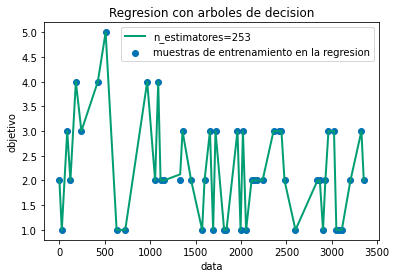

{'k': 2, 'max_depth': 8, 'n_estimators': 253}

In [ ]:
Opti(X,Y)

In [ ]:
dir(hyperopt.Trials)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_insert_trial_docs',
 'aname',
 'argmin',
 'assert_valid_trial',
 'asynchronous',
 'average_best_error',
 'best_trial',
 'count_by_state_synced',
 'count_by_state_unsynced',
 'delete_all',
 'fmin',
 'idxs',
 'idxs_vals',
 'insert_trial_doc',
 'insert_trial_docs',
 'losses',
 'miscs',
 'new_trial_docs',
 'new_trial_ids',
 'refresh',
 'results',
 'source_trial_docs',
 'specs',
 'statuses',
 'tids',
 'trial_attachments',
 'trials',
 'vals',
 'view']

In [ ]:
%%bash
#!/usr/bin/env bash

echo "Downloading Spark if necessary"
echo "Spark version = $SPARK_VERSION"
echo "Spark build = $SPARK_BUILD"
echo "Spark build URL = $SPARK_BUILD_URL"

sparkVersionsDir="$HOME/.cache/spark-versions"
mkdir -p "$sparkVersionsDir"
SPARK_BUILD_DIR="$sparkVersionsDir/$SPARK_BUILD"

if [[ -d "$SPARK_BUILD_DIR" ]]; then
    echo "Skipping download - found Spark dir $SPARK_BUILD_DIR"
else
    echo "Missing $SPARK_BUILD_DIR, downloading archive"
    filename="$HOME/.cache/spark-versions/$SPARK_BUILD.tgz"

    if ! [[ -d "$SPARK_BUILD_DIR" ]]; then
            echo "Downloading $SPARK_BUILD_URL ..."
            wget "$SPARK_BUILD_URL" -O $filename
            echo "[Debug] Following should list a valid spark binary"
            ls -larth $HOME/.cache/spark-versions/*
            tar -xzf $filename --directory $HOME/.cache/spark-versions > /dev/null
    fi

    echo "Content of $SPARK_BUILD_DIR:"
    ls -la "$SPARK_BUILD_DIR"
fi

Spark version = 
Spark build = 
Spark build URL = 
Skipping download - found Spark dir /root/.cache/spark-versions/


In [ ]:
import numpy as np
from sklearn import ensemble

N = 1000
train_x = np.random.randn(N, 10)
train_y = np.random.binomial(1, 0.1, N)

model = ensemble.RandomForestClassifier(10, class_weight="balanced").fit(train_x, train_y)



from pyspark import SparkContext
sc = SparkContext()

test_x = np.random.randn(N * 100, 10)
n_partitions = 10
rdd = sc.parallelize(test_x, n_partitions).zipWithIndex()

# Point 1
def batch(xs):
    yield list(xs)

batch_rdd = rdd.mapPartitions(batch)

# Point 2
b_model = sc.broadcast(model)

def split_id_and_data(xs):
    xs = list(xs)
    data = [x[0] for x in xs]
    ids = [x[1] for x in xs]
    return data, ids

# Point 3
result_rdd = batch_rdd.map(split_id_and_data) \
    .flatMap(lambda x: zip(x[1], b_model.value.predict(x[0])))

for _id, pred in result_rdd.take(10):
    print(_id, pred)

sc.stop()


Py4JJavaError: ignored

In [ ]:
!pip install --upgrade mlflow==1.18.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 33 kB/s 
     |████████████████████████████████| 81 kB 10.2 MB/s 
     |████████████████████████████████| 1.1 MB 45.1 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 146 kB 55.1 MB/s 
     |████████████████████████████████| 181 kB 67.6 MB/s 
     |████████████████████████████████| 596 kB 67.5 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158171 sha256=aa501f648c11b4c6b4f958ed66ff215bd27064d605adeb3c4ebebd92717731ca
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.17.0-

In [ ]:
import hyperopt

trials = hyperopt.SparkTrials()

AttributeError: ignored

In [ ]:
import numpy as np

 

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

 

from hyperopt import fmin, tpe, hp, SparkTrials, STATUS_OK, Trials

 

import mlflow

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


ImportError: ignored